# HOUSE PRICE PREDICTION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('House Data.csv')

In [3]:
train = pd.read_csv('train (2).csv')
test = pd.read_csv('test (2).csv')

print("Shape of train: ", train.shape)
print("Shape of test: ", test.shape)

Shape of train:  (252000, 13)
Shape of test:  (28000, 12)


In [4]:
train.head(10)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
5,6,6915937,64,0,single,rented,no,Civil_servant,Jalgaon,Maharashtra,0,12,0
6,7,3954973,58,14,married,rented,no,Librarian,Tiruppur,Tamil_Nadu,8,12,0
7,8,1706172,33,2,single,rented,no,Economist,Jamnagar,Gujarat,2,14,0
8,9,7566849,24,17,single,rented,yes,Flight_attendant,Kota[6],Rajasthan,11,11,0
9,10,8964846,23,12,single,rented,no,Architect,Karimnagar,Telangana,5,13,0


In [5]:
test.head(10)

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11
5,6,3437621,78,14,single,rented,no,Economist,Ramgarh,Jharkhand,3,10
6,7,5101498,55,0,married,rented,no,Artist,Pallavaram,Tamil Nadu,0,14
7,8,6716946,70,15,single,rented,yes,Flight attendant,Yamunanagar,Haryana,14,13
8,9,8369802,43,7,single,rented,no,Secretary,Anand,Gujarat,6,13
9,10,9565457,65,5,single,rented,yes,Engineer,Nandyal,Andhra Pradesh,3,12


In [6]:
df = pd.concat((train, test))
temp_df = df
print("Shape of df: ", df.shape)

Shape of df:  (280000, 14)


In [7]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,ID
0,1.0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0.0,NaN
1,2.0,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0.0,NaN
2,3.0,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0.0,NaN
3,4.0,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1.0,NaN
4,5.0,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1.0,NaN


In [8]:
df.tail()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,ID
27995,NaN,9955481,57,13,single,rented,no,Statistician,Eluru[25],Andhra Pradesh,5,10,NaN,27996.0
27996,NaN,2917765,47,9,single,rented,no,Technical writer,Ratlam,Madhya Pradesh,9,14,NaN,27997.0
27997,NaN,8082415,24,5,single,rented,no,Lawyer,Mira-Bhayandar,Maharashtra,4,13,NaN,27998.0
27998,NaN,9474180,51,13,single,rented,yes,Chartered Accountant,Bhilai,Chhattisgarh,13,14,NaN,27999.0
27999,NaN,9250350,42,9,single,rented,no,Chef,Navi Mumbai,Maharashtra,4,10,NaN,28000.0


# Exploratory Data Analysis (EDA)

In [9]:
pd.set_option("display.max_columns", 2000)
pd.set_option("display.max_rows", 85)

In [10]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,ID
0,1.0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0.0,NaN
1,2.0,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0.0,NaN
2,3.0,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0.0,NaN
3,4.0,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1.0,NaN
4,5.0,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1.0,NaN


In [11]:
df.tail()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,ID
27995,NaN,9955481,57,13,single,rented,no,Statistician,Eluru[25],Andhra Pradesh,5,10,NaN,27996.0
27996,NaN,2917765,47,9,single,rented,no,Technical writer,Ratlam,Madhya Pradesh,9,14,NaN,27997.0
27997,NaN,8082415,24,5,single,rented,no,Lawyer,Mira-Bhayandar,Maharashtra,4,13,NaN,27998.0
27998,NaN,9474180,51,13,single,rented,yes,Chartered Accountant,Bhilai,Chhattisgarh,13,14,NaN,27999.0
27999,NaN,9250350,42,9,single,rented,no,Chef,Navi Mumbai,Maharashtra,4,10,NaN,28000.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280000 entries, 0 to 27999
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Id                 252000 non-null  float64
 1   Income             280000 non-null  int64  
 2   Age                280000 non-null  int64  
 3   Experience         280000 non-null  int64  
 4   Married/Single     280000 non-null  object 
 5   House_Ownership    280000 non-null  object 
 6   Car_Ownership      280000 non-null  object 
 7   Profession         280000 non-null  object 
 8   CITY               280000 non-null  object 
 9   STATE              280000 non-null  object 
 10  CURRENT_JOB_YRS    280000 non-null  int64  
 11  CURRENT_HOUSE_YRS  280000 non-null  int64  
 12  Risk_Flag          252000 non-null  float64
 13  ID                 28000 non-null   float64
dtypes: float64(3), int64(5), object(6)
memory usage: 32.0+ MB


In [13]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,ID
count,252000.000000,2.800000e+05,280000.000000,280000.000000,280000.000000,280000.000000,252000.000000,28000.000000
mean,126000.500000,5.000361e+06,49.964132,10.088032,6.334418,11.997193,0.123000,14000.500000
std,72746.278255,2.876988e+06,17.070465,6.005066,3.646864,1.398907,0.328438,8083.048105
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000,1.000000
25%,63000.750000,2.506726e+06,35.000000,5.000000,3.000000,11.000000,0.000000,7000.750000
50%,126000.500000,5.003310e+06,50.000000,10.000000,6.000000,12.000000,0.000000,14000.500000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000,21000.250000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000,28000.000000


In [14]:
df.select_dtypes(include=['int64', 'float64']).columns

Index(['Id', 'Income', 'Age', 'Experience', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS', 'Risk_Flag', 'ID'],
      dtype='object')

In [15]:
df.select_dtypes(include=['object']).columns

Index(['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession',
       'CITY', 'STATE'],
      dtype='object')

In [17]:
df = df.set_index("Id")

In [18]:
df.head(6)

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,ID
Id,,,,,,,,,,,,,
1.0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0.0,NaN
2.0,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0.0,NaN
3.0,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0.0,NaN
4.0,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1.0,NaN
5.0,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1.0,NaN
6.0,6915937,64,0,single,rented,no,Civil_servant,Jalgaon,Maharashtra,0,12,0.0,NaN


<AxesSubplot:ylabel='Id'>

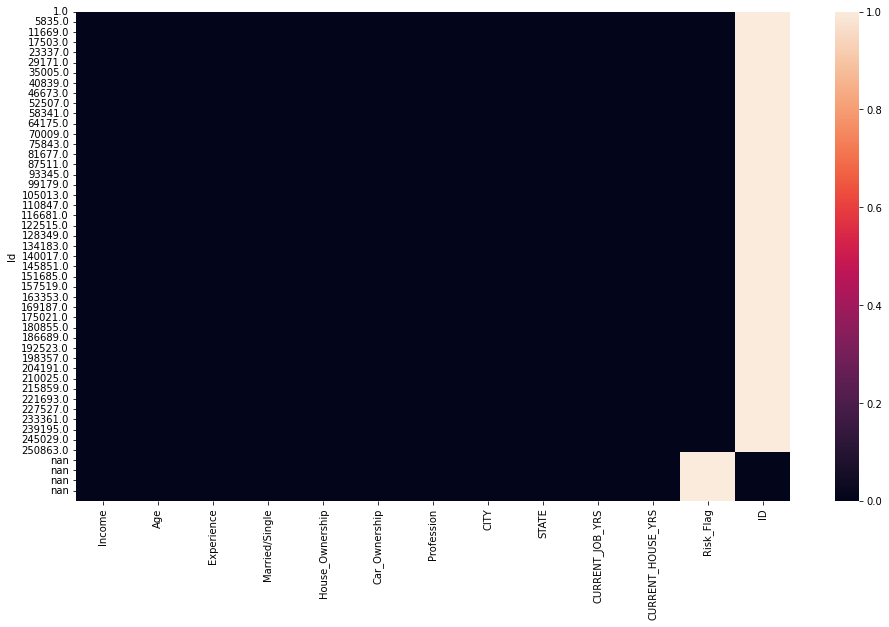

In [19]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

In [20]:
null_percent = df.isnull().sum()/df.shape[0]*100
null_percent

Income                0.0
Age                   0.0
Experience            0.0
Married/Single        0.0
House_Ownership       0.0
Car_Ownership         0.0
Profession            0.0
CITY                  0.0
STATE                 0.0
CURRENT_JOB_YRS       0.0
CURRENT_HOUSE_YRS     0.0
Risk_Flag            10.0
ID                   90.0
dtype: float64

In [21]:
col_for_drop = null_percent[null_percent > 20].keys()

In [22]:
df = df.drop(col_for_drop, "columns")
df.shape

(280000, 12)

In [23]:
for i in df.columns:
    print(i + "\t" + str(len(df[i].unique())))

Income	45900
Age	59
Experience	21
Married/Single	2
House_Ownership	3
Car_Ownership	2
Profession	74
CITY	333
STATE	37
CURRENT_JOB_YRS	15
CURRENT_HOUSE_YRS	5
Risk_Flag	3


In [24]:
for i in df.columns:
    print("Unique value of:>>> {} ({})\n{}\n".format(i, len(df[i].unique()), df[i].unique()))

Unique value of:>>> Income (45900)
[1303834 7574516 3991815 ... 9133227 4118700 9474180]

Unique value of:>>> Age (59)
[23 40 66 41 47 64 58 33 24 78 22 28 57 48 39 71 56 54 50 72 36 76 38 31
 52 59 21 26 55 45 77 63 30 25 73 75 27 74 67 46 68 79 42 60 32 65 49 35
 61 29 37 69 62 53 70 34 43 44 51]

Unique value of:>>> Experience (21)
[ 3 10  4  2 11  0 14 17 12  7  9  6  8  1 13 19 15 20  5 16 18]

Unique value of:>>> Married/Single (2)
['single' 'married']

Unique value of:>>> House_Ownership (3)
['rented' 'norent_noown' 'owned']

Unique value of:>>> Car_Ownership (2)
['no' 'yes']

Unique value of:>>> Profession (74)
['Mechanical_engineer' 'Software_Developer' 'Technical_writer'
 'Civil_servant' 'Librarian' 'Economist' 'Flight_attendant' 'Architect'
 'Designer' 'Physician' 'Financial_Analyst' 'Air_traffic_controller'
 'Politician' 'Police_officer' 'Artist' 'Surveyor' 'Design_Engineer'
 'Chemical_engineer' 'Hotel_Manager' 'Dentist' 'Comedian'
 'Biomedical_Engineer' 'Graphic_Designer' 

In [31]:
target=["price"]

In [32]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<Figure size 720x576 with 0 Axes>

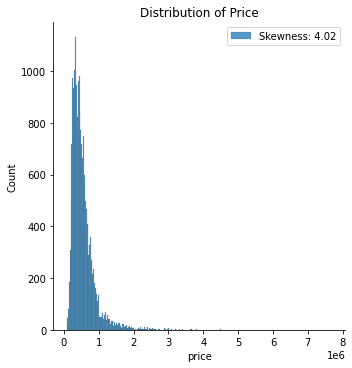

In [46]:
plt.figure(figsize=(10, 8))
bar = sns.displot(df["price"])
plt.legend(["Skewness: {:.2f}".format(df["price"].skew())])
plt.title("Distribution of Price")
plt.show()

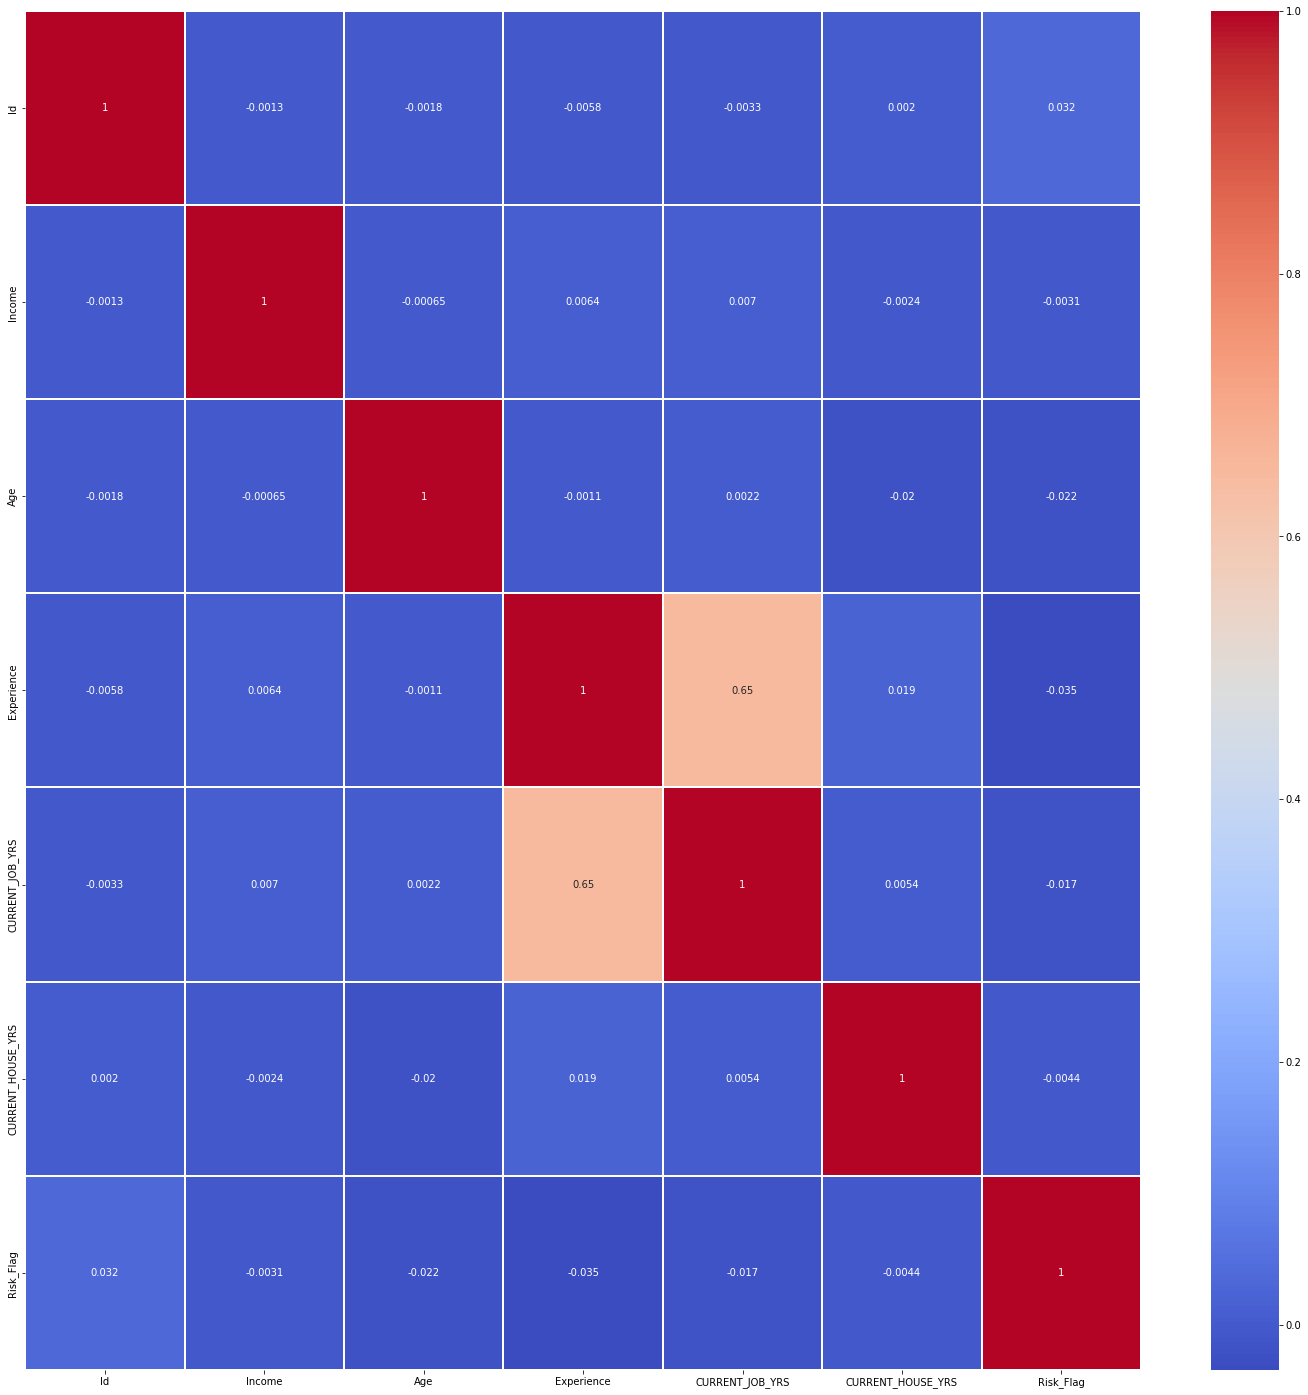

In [61]:
plt.figure(figsize=(25,25))
ax = sns.heatmap(train.corr(), cmap = "coolwarm", annot=True, linewidth=2)


In [19]:
hig_corr_df = pd.DataFrame({'price': [0.6, -0.3, 0.7, -0.2]})

hig_corr = [abs(value) >= 0.5 for value in hig_corr_df["price"]]
